# Variables

* integers, floats, strings, booleans

In [8]:
var = False

In [9]:
type(var)

bool

# Data Types

* Lists, dictionaries, sets, tuples

In [10]:
my_list = [1, 2, 3, 4]

In [ ]:
{}, ()

In [14]:
my_list.append(4)

In [16]:
my_list.append('Hello')

In [18]:
my_dict = {'key': 'value'}

In [31]:
my_dict['key2'] = 'value2'

In [36]:
my_tuple = ('1', 1)

In [37]:
my_tuple

('1', 1)

# Functions

In [44]:
def addition(num1, num2):
    return num1 + num2

In [45]:
addition(1, 2)

3

# Object Oriented Programming

In [61]:
class Animal(object):
    def __init__(self, age):
        self.age = age
        
    def get_age(self):
        return self.age
    
    def set_age(self, new_age):
        self.age = new_age


class Dog(Animal):
    def __init__(self, n_paws, breed, age, has_long_tail):
        super().__init__(age)
        
        self.n_paws = n_paws
        self.breed = breed
        self.has_long_tail = has_long_tail
    
    def get_breed(self):
        return self.breed
    
    
    

In [62]:
dog = Dog(4, 'Golden Retriever', 3, True)

In [63]:
dog.get_age()

3

In [56]:
dog.set_age(8)

In [57]:
dog.get_age()

8

# Packages

In [ ]:
%pip install ____

**Module Not Found Error**

# Scraping Example

In [ ]:
%pip install requests beautifulsoup4 pandas

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

response = requests.get('https://www.pro-football-reference.com/years/2024/')

soup = BeautifulSoup(response.content, 'html.parser')

In [84]:
table = soup.find('table')

cols = [elem.get_text() for elem in table.find('tr').find_all('th')]



In [127]:
cols.insert(1, 'Tm Link')

In [128]:
cols


['Tm',
 'Tm Link',
 'W',
 'L',
 'W-L%',
 'PF',
 'PA',
 'PD',
 'MoV',
 'SoS',
 'SRS',
 'OSRS',
 'DSRS']

In [137]:
def parse_table(soup, 
                cols,
                leagues = ['AFC', 'NFC']):
    
    team_stats = []
    for league in leagues:
        table = soup.find('table', {'id': league})
        
        for row in table.find('tbody').find_all('tr'):
            items = row.find_all('td')
            if len(items) == 1:
                continue
            team = row.find('th').find('a').get_text()
            link = row.find('th').find('a')['href']

            stats = [stat.get_text() for stat in items]

            stats.insert(0, team)
            stats.insert(1, link)

            team_stats.append(stats)
            
    return pd.DataFrame(team_stats, columns= cols)
    

In [140]:
df = parse_table(soup, cols)

In [142]:
df.dtypes

Tm         object
Tm Link    object
W          object
L          object
W-L%       object
PF         object
PA         object
PD         object
MoV        object
SoS        object
SRS        object
OSRS       object
DSRS       object
dtype: object

In [145]:
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)

In [154]:
df['Prop_PF'] = df['PF'] / (df['PF'] + df['PA'])

In [156]:
df.sort_values(by='Prop_PF', ascending=False)

,Tm,Tm Link,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Prop_PF
20,Detroit Lions,/teams/det/2024.htm,15.0,2.0,0.882,564.0,342.0,222.0,13.1,0.7,13.8,10.6,3.2,0.622517
16,Philadelphia Eagles,/teams/phi/2024.htm,14.0,3.0,0.824,463.0,303.0,160.0,9.4,-1.7,7.7,3.0,4.7,0.604439
4,Baltimore Ravens,/teams/rav/2024.htm,12.0,5.0,0.706,518.0,361.0,157.0,9.2,0.6,9.9,8.0,1.9,0.589306
0,Buffalo Bills,/teams/buf/2024.htm,13.0,4.0,0.765,525.0,368.0,157.0,9.2,-1.1,8.1,7.8,0.3,0.587906
14,Denver Broncos,/teams/den/2024.htm,10.0,7.0,0.588,425.0,311.0,114.0,6.7,-0.3,6.4,2.1,4.3,0.577446
22,Green Bay Packers,/teams/gnb/2024.htm,11.0,6.0,0.647,460.0,338.0,122.0,7.2,0.9,8.1,4.9,3.2,0.576441
13,Los Angeles Chargers,/teams/sdg/2024.htm,11.0,6.0,0.647,402.0,301.0,101.0,5.9,-0.6,5.3,0.6,4.7,0.571835
24,Tampa Bay Buccaneers,/teams/tam/2024.htm,10.0,7.0,0.588,502.0,385.0,117.0,6.9,-0.4,6.4,6.0,0.4,0.565953
21,Minnesota Vikings,/teams/min/2024.htm,14.0,3.0,0.824,432.0,332.0,100.0,5.9,0.3,6.2,2.8,3.4,0.565445
17,Washington Commanders,/teams/was/2024.htm,12.0,5.0,0.706,485.0,391.0,94.0,5.5,-1.8,3.7,4.9,-1.2,0.553653


# Plotting

In [ ]:
%pip install matplotlib pillow tqdm

In [167]:
def extract_team_logo(url: str):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    img_url = soup.find('img', {'class': 'teamlogo'})['src']
    return img_url
    

In [197]:
from io import BytesIO
from PIL import Image
import time
from tqdm import tqdm

def img_list(urls: list):
    img_list = []
    base_url = 'https://www.pro-football-reference.com'
    
    for url in tqdm(urls, desc='Scraping Logos'):
        fmt_url = base_url + url
        img_url = extract_team_logo(fmt_url)
        
        response = requests.get(img_url)
        img_loaded = Image.open(BytesIO(response.content))
        
        img_list.append(img_loaded)
        
        time.sleep(5)
        
    return img_list 

In [198]:
logos = img_list(df['Tm Link'])

Scraping Logos: 100%|███████████████████████████| 32/32 [02:56<00:00,  5.51s/it]


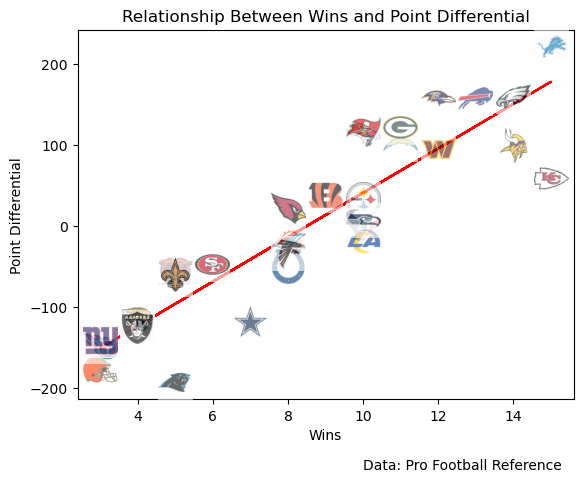

In [233]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

fig, ax = plt.subplots()


plt.scatter(df['W'], df['PD'], c='white')

for logo, x, y in zip(logos, df['W'], df['PD']):
    img = logo.convert('RGB')
    
    img = OffsetImage(img, zoom=0.2, resample=True, alpha = 0.6)
    annot = AnnotationBbox(img, (x, y), frameon=False)
    ax.add_artist(annot)
    
plt.xlabel('Wins')
plt.ylabel('Point Differential')
plt.title('Relationship Between Wins and Point Differential')

plt.plot(df['W'], df['PD_pred'], c = 'red')
plt.text(10, -300, 'Data: Pro Football Reference')

plt.show()

# Simple Regression Model

In [ ]:
%pip install scikit-learn numpy

In [219]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(df[['W']], df['PD'])


LinearRegression()

In [220]:
reg.coef_

array([27.43661972])

In [221]:
reg.intercept_

-233.2112676056339

$y = 27.437x - 233.211$

In [224]:
df['PD_pred'] = reg.predict(df[['W']])

In [227]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print('R2 Score:', r2_score(df['PD'], df['PD_pred']))
print('RMSE:', np.sqrt(mean_squared_error(df['PD'], df['PD_pred'])))

R2 Score: 0.8232338250318472
RMSE: 46.387225050517124
